In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy import integrate
from scipy import stats

In [2]:
file = 'gaia_edr3_selected.csv'
df = pd.read_csv(file)

In [3]:
seed = 9+13+15+28+32+44+45+47

np.random.seed(seed)

x = np.random.randint(0, 100000, 10)

parallax = df.loc[x]['parallax_corr']
error = df.loc[x]['parallax_error']
parallax

3879     0.699477
15829    0.185456
43377   -0.174356
22524    1.581502
17539    0.567943
89941    0.492549
72107    0.350555
17572    0.244145
59121    2.187498
68326   -0.931428
Name: parallax_corr, dtype: float64

In [36]:
cdf = df['source_id'].apply(str)

In [10]:
df.head()

,source_id,ra,dec,l,b,parallax_corr,pmra,pmdec,phot_g_mean_mag_corr,phot_bp_mean_mag,...,phot_rp_mean_flux_error,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,bp_rp,qg_geo,gq_photogeo
0,2061562797215848448,302.589557,37.708650,74.745361,2.361544,-0.607505,-3.315259,-4.990115,20.066350,21.579153,...,5.601715,7330.61670,4019.29761,12348.19920,8843.65039,6865.19531,11302.22850,2.702530,5.761740,5.354285
1,2061540222860316544,302.526509,37.713771,74.722468,2.406163,-1.511858,-1.456022,-3.840999,20.899767,21.516775,...,7.298082,5621.54150,3236.02710,9451.20508,8979.61426,7200.33447,11818.05370,1.483046,7.151377,6.134365
2,2061559155056204544,302.680988,37.623223,74.713205,2.254290,-0.492183,-4.457431,-7.561829,20.493390,21.279732,...,4.672759,7481.16602,3917.42749,17194.64260,6027.78955,4312.84424,9107.13281,1.776276,6.128641,6.597697
3,2061540154116752896,302.500392,37.697435,74.697494,2.414604,0.367920,0.203892,-4.203328,20.554945,21.639372,...,6.036945,4276.34766,2506.28687,7644.29346,6918.50488,2852.52637,9539.95410,2.094721,7.410044,6.365347
4,2061533587115821056,302.523455,37.508159,74.548540,2.296243,0.296159,-4.395218,-9.173412,16.758663,17.369360,...,7.081408,3734.61255,3211.54395,4351.26270,3369.18530,2911.50781,3843.28149,1.416966,3.897435,4.121039


In [5]:
def likelihood(p, r, sigma):
    return norm.pdf(p, loc= 1000/r, scale=sigma)

#Uniform Prior
def Prior_uniform(r, rlim):
    return np.piecewise(r, [r <= 0, (r > 0)*(r<=rlim), r > rlim], [0, 1/rlim, 0])
    
#     return np.piecewise(r, [r < 0, 0 < r < rlim, r > rlim], [0, 1/rlim, 0])
#Exponential Prior

def Prior_exponential(r, L):
    return r**2*np.exp(-r/L)/Area
######################################################################

def Posterior(r, p, sigma_p, rmin, rlim,prior='Uniform'):
    if prior == 'Uniform':
        return Prior_uniform(r, rlim)*likelihood(p, r, sigma_p)
    elif prior == 'Exp':
        return Prior_exponential(r, 1350)*likelihood(p, r, sigma_p)
    else:
        raise ValueError("Error, hehe")
        
def Cumulative(low, high, AREA, prior):
    return integrate.quad(lambda r: Posterior(r, parallax.iloc[test], error.iloc[test], 0, rlim, prior), low, high)[0]/AREA

Mean =  1441.3959051556903
Mode =  1429.684536276518
Median =  1437.4265213664678
upper 90% credible interval =  1572.6975086902848
upper 90% credible interval =  1323.6156652007016


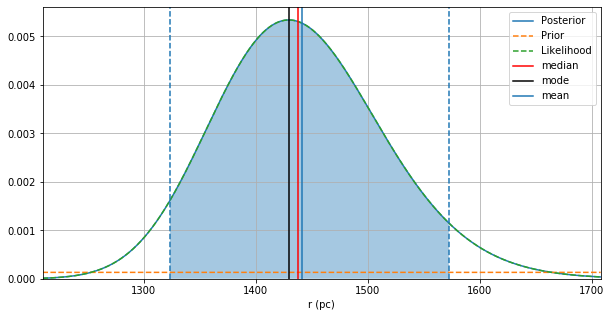

Mean =  9219.099922710437
Mode =  5391.814561239942
Median =  7098.386834899518
upper 90% credible interval =  23292.109777616213
upper 90% credible interval =  4144.313773723248


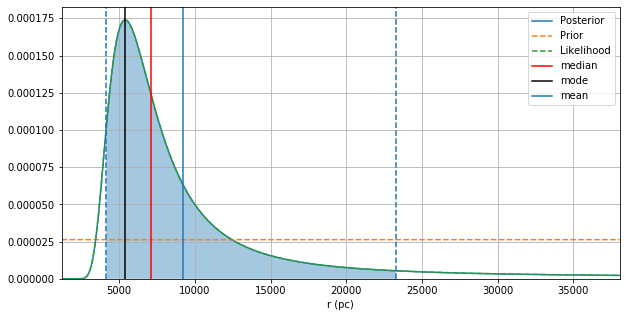

Mean =  52117.28301748808
Mode =  100000.0
Median =  52341.85748447345
upper 90% credible interval =  95248.5251574797
upper 90% credible interval =  8200.348715698789


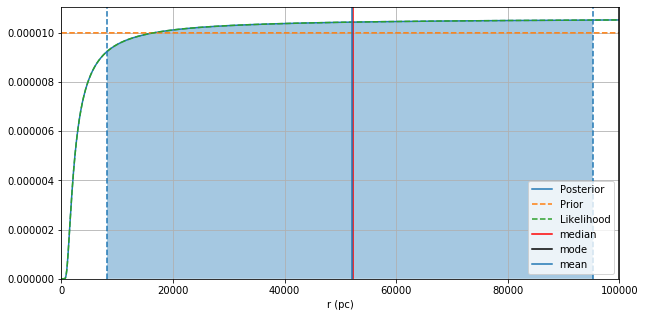

Mean =  2952.5304779983217
Mode =  632.336089147511
Median =  2509.615195442434
upper 90% credible interval =  6566.004842220509
upper 90% credible interval =  527.6877946601843


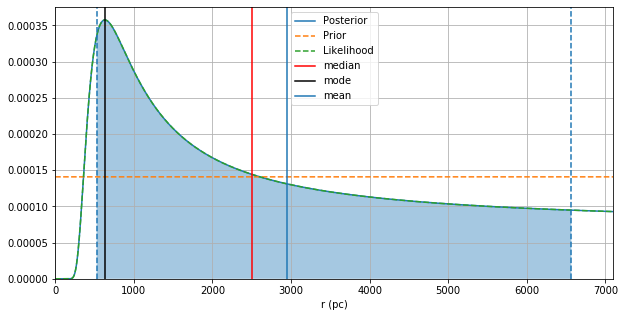

Mean =  3367.1348866548124
Mode =  1760.6943831537753
Median =  2485.650782651852
upper 90% credible interval =  9040.080926735764
upper 90% credible interval =  1349.6673958575038


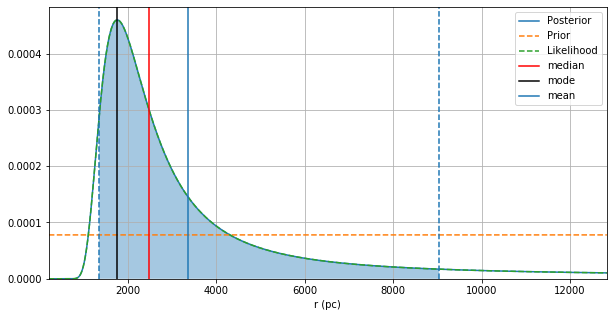

Mean =  48162.07323415738
Mode =  2030.1385707714153
Median =  47460.52029806775
upper 90% credible interval =  94699.17523826897
upper 90% credible interval =  4218.7565393122395


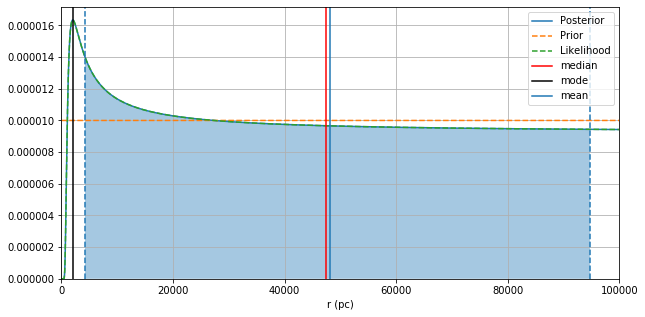

Mean =  4782.332726660509
Mode =  2852.7934118326566
Median =  3713.834752728724
upper 90% credible interval =  11881.847790918735
upper 90% credible interval =  2194.068120714629


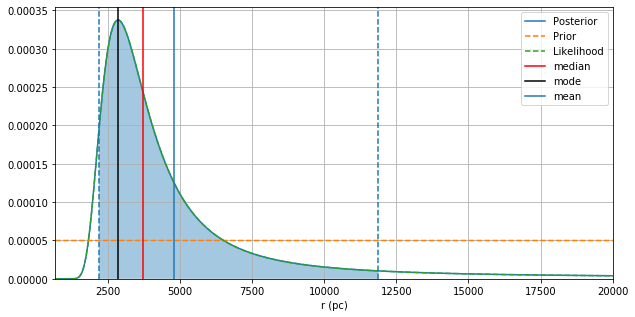

Mean =  4681.476231452528
Mode =  4095.679607215978
Median =  4436.315340580142
upper 90% credible interval =  6835.203227251233
upper 90% credible interval =  3305.5307467781504


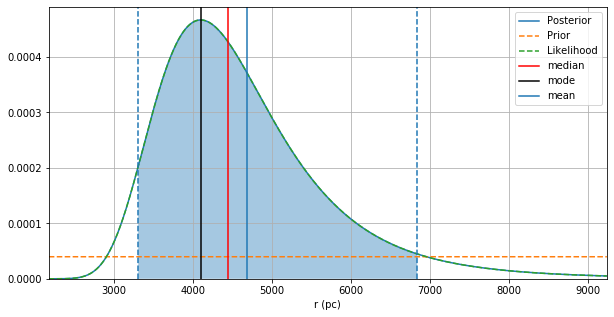

Mean =  464.3421615871465
Mode =  457.1533685093144
Median =  461.8830050350393
upper 90% credible interval =  524.210361548619
upper 90% credible interval =  412.83892353851417


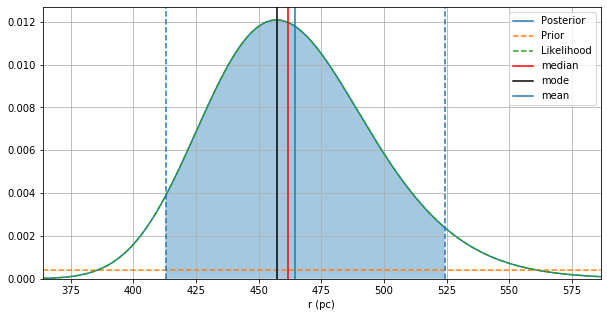

Mean =  52484.502919199054
Mode =  100000.0
Median =  52837.31330000147
upper 90% credible interval =  95308.5478984195
upper 90% credible interval =  8431.358178310504


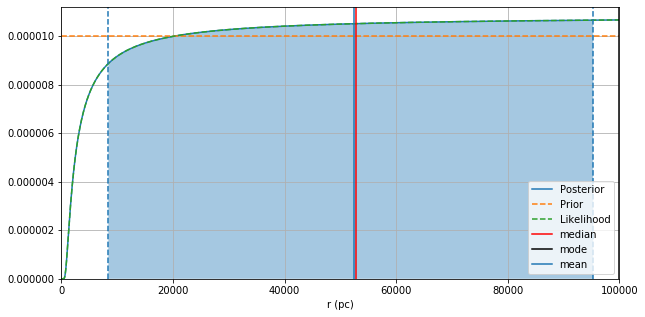

In [48]:
means = []
modes = []
medians =  []
uppers = []
lowers = []

for count in range(len(x)):
    test = count

    ########### PLOT
    #################### Uniform distance
    ######################################################################################

    resolution = 50000
    rlim = 100000
    if parallax.iloc[test] - error.iloc[test]> 0:
        rlim = np.min([rlim, 1000/(parallax.iloc[test]-error.iloc[test])*5]) #pc
    rmin = 0.1

    r = np.linspace(rmin, rlim, resolution)

    #######################################################################################
    ###############################

    Likelihood = likelihood(parallax.iloc[test], r, error.iloc[test])
    Area = integrate.simps(Likelihood, r)
    Likelihood /= Area    #Normalize the likelihood

    prior = Prior_uniform(r, rlim)

    posterior = Posterior(r, parallax.iloc[test], error.iloc[test], rmin, rlim, prior='Uniform')
    Area = integrate.simps(posterior, r)
    posterior /= Area    #Normalize the posterior
    
    AREA = integrate.quad(Posterior, rmin, rlim, args=(parallax.iloc[test], error.iloc[test], 0, rlim, 'Uniform'))[0]

    # Mean
    mean = integrate.simps(posterior*r,r)
    diff = np.abs(r-mean)
    mean_index, = np.where(diff==np.min(diff))[0]
    mode_index, = np.where(posterior==np.max(posterior))[0]
    mode = r[mode_index]

    rr = 0
    median = rlim
    for i in range(10):
        while(rr < median):
            check = Cumulative(rmin, rr, AREA, prior='Uniform')
            if check > 0.5:
                median = rr
            rr += mean/10**i
        rr -= 2*mean/10**i

    print('Mean = ', mean)
    print('Mode = ', mode)
    print('Median = ', median)

    alpha = 90

    upper = rlim
    lower = 0
    rr = mode
    for i in range(10):
        while(rr < upper):
            CEK = Cumulative(median, rr, AREA, prior='Uniform')
            if CEK > alpha/200:
                upper = rr
            rr += mean/10**i
        rr -= 2*mean/10**i

    for i in range(10):
        while(rr > lower):
            CEK = Cumulative(rr, median, AREA, prior='Uniform')
            if CEK > alpha/200:
                lower = rr
            rr -= mean/10**i
        rr += 2*mean/10**i

    print('upper 90% credible interval = ', upper)
    print('upper 90% credible interval = ', lower)

    diff = np.abs(r-lower)
    lower_index, = np.where(diff==np.min(diff))[0]
    diff = np.abs(r-upper)
    upper_index, = np.where(diff==np.min(diff))[0]

    xbelow = np.max([0, median-(median-lower)*2])
    xup = np.min([rlim, median+(upper-median)*2])

    plt.figure(figsize=(10,5))
    plt.plot(r, posterior, label='Posterior')
    plt.plot(r, prior, label='Prior', ls='--')
    plt.plot(r, Likelihood, label='Likelihood', ls='--')
    plt.xlabel('r (pc)')
    plt.axvline(median, label='median', c='r')
    plt.axvline(mode, label='mode', c='k')
    plt.axvline(mean, label='mean')
    plt.axvline(lower, ls='--')
    plt.axvline(upper, ls='--')
    plt.legend()
    plt.xlim(xbelow, xup)
    plt.ylim(0)
    plt.fill_between(r[lower_index:upper_index],posterior[lower_index:upper_index], alpha=0.4)
    plt.grid()
    name = './uniform/p_uniform_{id}.png'.format(id=cdf[x[test]])
    plt.savefig(name, dpi=70)
    plt.show()
    
    means.append(mean)
    modes.append(mode)
    medians.append(median)
    lowers.append(lower)
    uppers.append(upper)

In [51]:
with open('./uniform/uniform.csv', 'w') as f:
    f.write('source_id,mean,median,mode,upper,lower\n')
    for i in range(len(x)):
        f.write(str(cdf[x[i]])+',')
        f.write(str(means[i])+',')
        f.write(str(medians[i])+',')
        f.write(str(modes[i])+',')
        f.write(str(uppers[i])+',')
        f.write(str(lowers[i])+'\n')

Mean =  1445.0944312839629
Mode =  1433.303355902152
Median =  1441.1005356534636
upper 90% credible interval =  1577.0530160666933
upper 90% credible interval =  1326.7407601622042


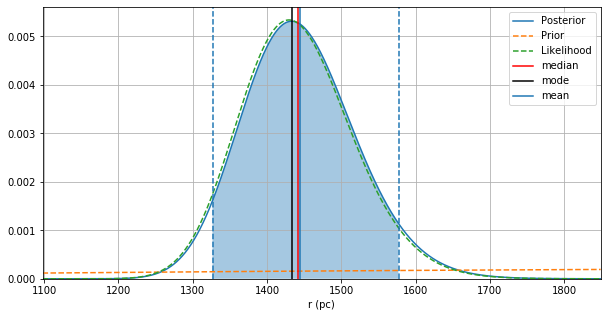

Mean =  5538.3190740425625
Mode =  4818.017415273122
Median =  5274.577396837803
upper 90% credible interval =  8259.640030870345
upper 90% credible interval =  3713.717298554225


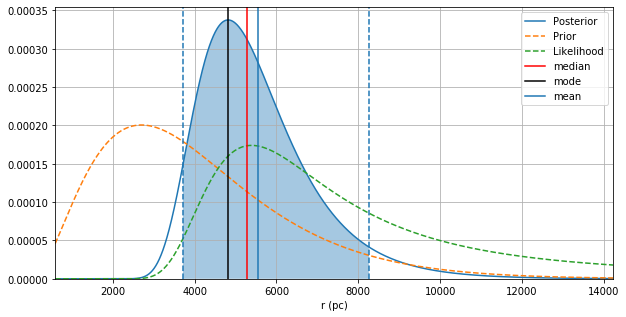

Mean =  4876.555207244767
Mode =  3540.1672613452265
Median =  4439.106597138793
upper 90% credible interval =  9281.135397452816
upper 90% credible interval =  1966.4719786073492


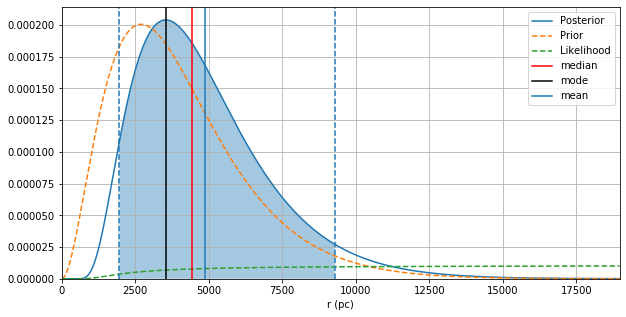

Mean =  2982.9272287328836
Mode =  1666.8009769824007
Median =  2715.42741875402
upper 90% credible interval =  6100.755019934837
upper 90% credible interval =  788.5776663538722


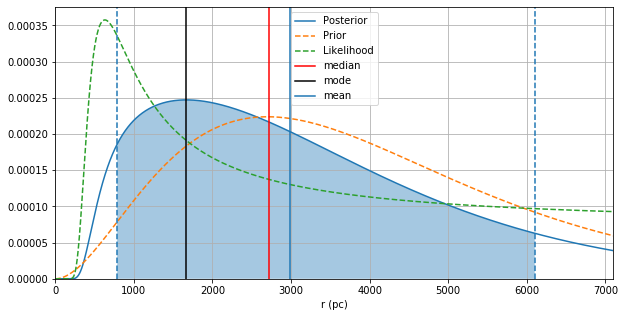

Mean =  2702.873546838769
Mode =  1880.78739748346
Median =  2361.705890307422
upper 90% credible interval =  5198.2346634766
upper 90% credible interval =  1388.227893347139


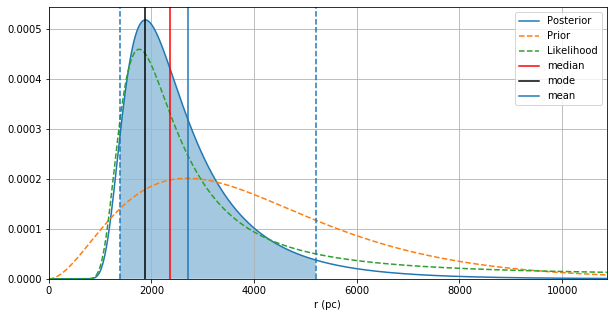

Mean =  3959.5994181734177
Mode =  2472.1469689393784
Median =  3487.6840764358153
upper 90% credible interval =  8155.157983202582
upper 90% credible interval =  1376.469540063473


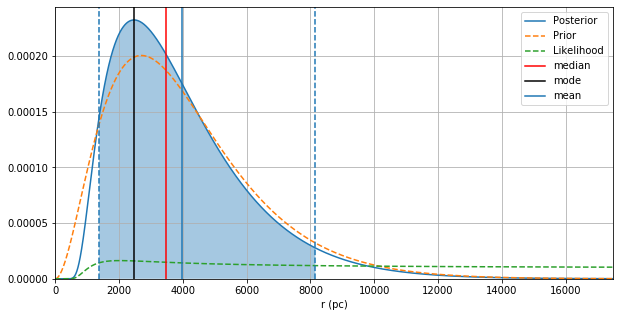

Mean =  3523.7354869364403
Mode =  2830.372242560709
Median =  3251.789569242589
upper 90% credible interval =  5832.675422976309
upper 90% credible interval =  2140.0712203149624


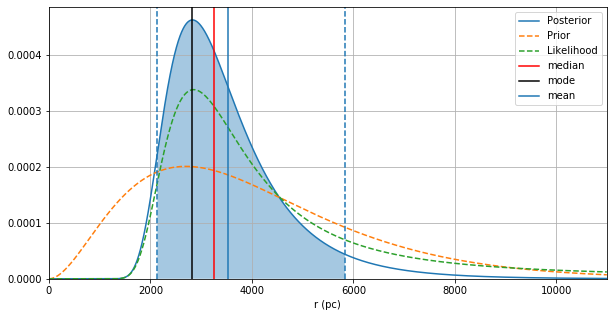

Mean =  4344.132281156972
Mode =  3971.5254389559946
Median =  4206.477246311362
upper 90% credible interval =  5924.809061985531
upper 90% credible interval =  3227.800926217858


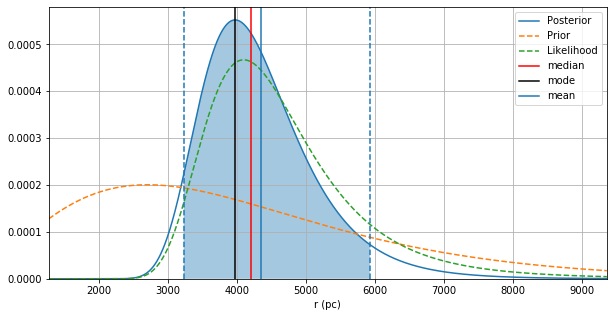

Mean =  468.50169871005374
Mode =  461.04129960786463
Median =  465.95281287571316
upper 90% credible interval =  529.7365694471075
upper 90% credible interval =  415.93616129355695


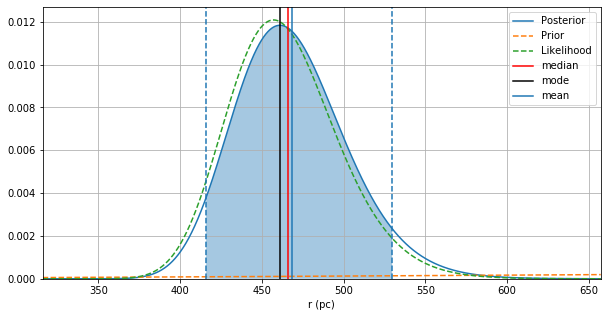

Mean =  4823.525321240968
Mode =  3500.166501330026
Median =  4389.6343139021055
upper 90% credible interval =  9288.432875141609
upper 90% credible interval =  1840.9422221768673


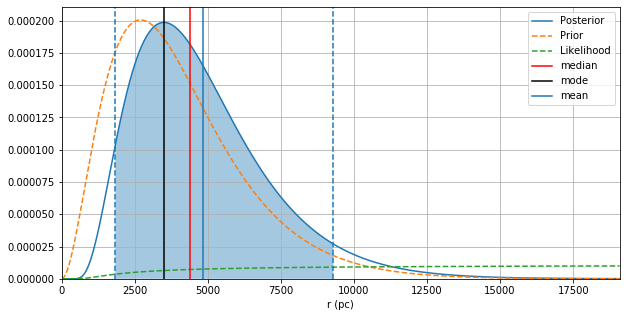

In [62]:
means = []
modes = []
medians =  []
uppers = []
lowers = []

for count in range(len(x)):
    test = count

    ########### PLOT
    #################### Uniform distance
    ######################################################################################

    resolution = 50000
    rlim = 100000
    if parallax.iloc[test] - error.iloc[test]> 0:
        rlim = np.min([rlim, 1000/(parallax.iloc[test]-error.iloc[test])*5]) #pc
    rmin = 0.1

    r = np.linspace(rmin, rlim, resolution)

    #################### Exponentially Decreasing space density with scale length 1350 pc
    ######################################################################################

    prior = Prior_exponential(r, 1350)
    Area = integrate.simps(prior, r)
    prior /= Area    #Normalize the prior

    posterior = Posterior(r, parallax.iloc[test], error.iloc[test], rmin, rlim, prior='Exp')
    Area = integrate.simps(posterior, r)
    posterior /= Area    #Normalize the posterior

    Likelihood = likelihood(parallax.iloc[test], r, error.iloc[test])
    Area = integrate.simps(Likelihood, r)
    Likelihood /= Area    #Normalize the likelihood

    prior = Prior_exponential(r, 1350)
    Area = integrate.simps(prior, r)
    prior /= Area    #Normalize the likelihood


    posterior = Posterior(r, parallax.iloc[test], error.iloc[test], rmin, rlim, prior='Exp')
    Area = integrate.simps(posterior, r)
    posterior /= Area    #Normalize the posterior
    
    AREA = integrate.quad(lambda r: Posterior(r, parallax.iloc[test], error.iloc[test], 0, rlim, 'Exp'), rmin, rlim)[0]

    # Mean
    mean = integrate.simps(posterior*r,r)
    diff = np.abs(r-mean)
    mean_index, = np.where(diff==np.min(diff))[0]
    mode_index, = np.where(posterior==np.max(posterior))[0]
    mode = r[mode_index]

    rr = 0
    median = rlim
    for i in range(10):
        while(rr < median):
            check = Cumulative(rmin, rr, AREA, 'Exp')
            if check > 0.5:
                median = rr
            rr += mean/10**i
        rr -= 2*mean/10**i

    print('Mean = ', mean)
    print('Mode = ', mode)
    print('Median = ', median)

    alpha = 90

    upper = rlim
    lower = 0
    rr = mode
    for i in range(10):
        while(rr < upper):
            CEK = Cumulative(median, rr, AREA, 'Exp')
            if CEK > alpha/200:
                upper = rr
            rr += mean/10**i
        rr -= 2*mean/10**i

    for i in range(10):
        while(rr > lower):
            CEK = Cumulative(rr, median, AREA, 'Exp')
            if CEK > alpha/200:
                lower = rr
            rr -= mean/10**i
        rr += 2*mean/10**i
    print('upper 90% credible interval = ', upper)
    print('upper 90% credible interval = ', lower)

    diff = np.abs(r-lower)
    lower_index, = np.where(diff==np.min(diff))[0]
    diff = np.abs(r-upper)
    upper_index, = np.where(diff==np.min(diff))[0]

    xbelow = np.max([0, median-(median-lower)*3])
    xup = np.min([rlim, median+(upper-median)*3])

    plt.figure(figsize=(10,5))
    plt.plot(r, posterior, label='Posterior')
    plt.plot(r, prior, label='Prior', ls='--')
    plt.plot(r, Likelihood, label='Likelihood', ls='--')
    plt.xlabel('r (pc)')
    plt.axvline(median, label='median', c='r')
    plt.axvline(mode, label='mode', c='k')
    plt.axvline(mean, label='mean')
    plt.axvline(lower, ls='--')
    plt.axvline(upper, ls='--')
    plt.legend()
    plt.xlim(xbelow, xup)
    plt.ylim(0)
    plt.fill_between(r[lower_index:upper_index],posterior[lower_index:upper_index], alpha=0.4)
    plt.grid()
    name = './uniform/p_exp_{id}.png'.format(id=cdf[x[test]])
    plt.savefig(name, dpi=70)
    plt.show()
    
    means.append(mean)
    modes.append(mode)
    medians.append(median)
    lowers.append(lower)
    uppers.append(upper)

In [63]:
with open('./uniform/exp.csv', 'w') as f:
    f.write('source_id,mean,median,mode,upper,lower\n')
    for i in range(len(x)):
        f.write(str(cdf[x[i]])+',')
        f.write(str(means[i])+',')
        f.write(str(medians[i])+',')
        f.write(str(modes[i])+',')
        f.write(str(uppers[i])+',')
        f.write(str(lowers[i])+'\n')